# Exercise 3: KPI and exploration data analysis

Ín this part iof the project I will come up with a few key performance indicators(KPI) within the data frames. I will see if i discover anything interesting from explorations.
These are the KPI i will explore:
- Which age group had the most total deaths? Was the group with the highest death rate have the highest infection rate?
- Show how the cases and deaths differed in different regions of Sweden.
- What is the difference between genders with taking the first and second dose? Include as well the difference of the total population. 

In [662]:
# importing relative packages that i may use within my explorations
import pandas as pd # used for creating dataframes
import numpy as np # used for mathematical functions
import plotly_express as px # I will use plotly express as i think it is great to show interactive graphs
import matplotlib.pyplot as plt

----
### Which age group had the most total deaths? Was the group with highest death rate have the highest infection rate?

In [663]:
# importing the first data frame that i will use
df_age_groups = pd.read_excel("../Lab_Covid/Data/Folkhalsomyndigheten_Covid19.xlsx","Totalt antal per åldersgrupp")
df_age_groups.info() # Finding some info about the dataframe, there is no Nan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Åldersgrupp                   11 non-null     object
 1   Totalt_antal_fall             11 non-null     int64 
 2   Totalt_antal_intensivvårdade  11 non-null     int64 
 3   Totalt_antal_avlidna          11 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 480.0+ bytes


In [664]:
df_age_groups.pop('Totalt_antal_intensivvårdade') # removes the column we will not use
df_age_groups

,Åldersgrupp,Totalt_antal_fall,Totalt_antal_avlidna
0,Ålder_0_9,138071,17
1,Ålder_10_19,355823,9
2,Ålder_20_29,418506,41
3,Ålder_30_39,493443,71
4,Ålder_40_49,474702,172
5,Ålder_50_59,378468,523
6,Ålder_60_69,180079,1422
7,Ålder_70_79,87096,4654
8,Ålder_80_89,58170,8326
9,Ålder_90_plus,26677,5420


In [665]:
age_covid_cases = px.bar(
    df_age_groups, # Dataframe
    x="Åldersgrupp", # Column
    y=["Totalt_antal_fall","Totalt_antal_avlidna"], # Using the 2 columns as a list to receive each value
    title="Total fall och avlinda per Åldersgrupp ", # Creating a title. 
    barmode= "group", # This groups the bars into 2, instead of them being stacked
    text_auto=".2s",
    labels={
        "variable": "Antal fall/avlinda",
        "value":"Summa"}        
    )
age_covid_cases.update_yaxes(type="log") # using log to as data has a big range between the 2.
age_covid_cases.show() # Showing the plot
age_covid_cases.write_html("Visualiseringar/Total_fall_avlinda_Åldersgrupp.html") # Saving as html

From this graph we can see that the age group that had the most deaths was 80 to 89. This didn't have the highest infection rate.
In fact it was one of the groups with the lowest infection rate.
The group with the highest infection rate was between 30 and 39. This was also one of the groups with the lowest death rate. 
We could maybe conclude that the reason there was more death at the 80 to 89 ages is because that is a more vulnerable age to fight disease.
We could also maybe conclude that the reason why the group between 30 and 39 had higher infection rate is because that age group may integrate more socially and the death rate less as the body is less vulnerable.
Note: The dataframe also has a section that has missing data. This has to be taken into account with my estimates. 


----
### Show how the cases and deaths differed in different regions of Sweden.

In [666]:
df_regions_covid = pd.read_excel("../Lab_Covid/Data/Folkhalsomyndigheten_Covid19.xlsx","Totalt antal per region") # Reading in the relevant file and sheet
df_regions_covid.info() # The information has no NaN values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        21 non-null     object 
 1   Totalt_antal_fall             21 non-null     int64  
 2   Fall_per_100000_inv           21 non-null     float64
 3   Totalt_antal_intensivvårdade  21 non-null     int64  
 4   Totalt_antal_avlidna          21 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 968.0+ bytes


In [667]:
df_regions_covid.pop("Fall_per_100000_inv") # removing the columns we wont use
df_regions_covid.pop("Totalt_antal_intensivvårdade")
df_regions_covid

,Region,Totalt_antal_fall,Totalt_antal_avlidna
0,Blekinge,30829,184
1,Dalarna,75091,544
2,Gotland,11874,82
3,Gävleborg,74803,754
4,Halland,108822,518
5,Jämtland Härjedalen,34347,197
6,Jönköping,89662,756
7,Kalmar,62810,385
8,Kronoberg,51460,410
9,Norrbotten,50755,459


In [668]:
# Downloaded an excel file with län population from www. scb.se
df_Län_pop = pd.read_excel("../Lab_Covid/Data/Län_population.xlsx")
df_Län_pop = df_Län_pop.iloc[2: , :] # removing first two rows
df_Län_pop = df_Län_pop.iloc[:,1:].reset_index(drop = True) #removing the first column and resetting index
df_Län_pop = df_Län_pop.iloc[:-48:] # removing the last 48 lines which contained nothing
df_Län_pop.replace('\d+', '', regex=True, inplace=True) # This will take away the numbers at the beginning of the string in the Län names
df_Län_pop.rename(columns={"Unnamed: 2":"Folkmängd"},inplace=True) # This renames the 2nd column to be used in the merge for the next step
df_Län_pop = df_Län_pop.sort_values(by= "Unnamed: 1", ascending=True).reset_index(drop=True) # Sorting the values to alphabetically to match the other dataframe
df_Län_pop


,Unnamed: 1,Folkmängd
0,Blekinge län,158999
1,Dalarnas län,288164
2,Gotlands län,60972
3,Gävleborgs län,287873
4,Hallands län,339903
5,Jämtlands län,131914
6,Jönköpings län,366840
7,Kalmar län,246989
8,Kronobergs län,203243
9,Norrbottens län,249752


In [669]:
# Now i will merge the two data frames so i can add the column of population
df_Län_data = pd.concat([df_regions_covid, df_Län_pop], axis = "columns")
df_Län_data
# The data lines up perfectly. Will now remove the extra column with the Län names

,Region,Totalt_antal_fall,Totalt_antal_avlidna,Unnamed: 1,Folkmängd
0,Blekinge,30829,184,Blekinge län,158999
1,Dalarna,75091,544,Dalarnas län,288164
2,Gotland,11874,82,Gotlands län,60972
3,Gävleborg,74803,754,Gävleborgs län,287873
4,Halland,108822,518,Hallands län,339903
5,Jämtland Härjedalen,34347,197,Jämtlands län,131914
6,Jönköping,89662,756,Jönköpings län,366840
7,Kalmar,62810,385,Kalmar län,246989
8,Kronoberg,51460,410,Kronobergs län,203243
9,Norrbotten,50755,459,Norrbottens län,249752


In [670]:
df_Län_data.drop("Unnamed: 1", inplace=True, axis=1) # deletes the extra Län column
df_Län_data


,Region,Totalt_antal_fall,Totalt_antal_avlidna,Folkmängd
0,Blekinge,30829,184,158999
1,Dalarna,75091,544,288164
2,Gotland,11874,82,60972
3,Gävleborg,74803,754,287873
4,Halland,108822,518,339903
5,Jämtland Härjedalen,34347,197,131914
6,Jönköping,89662,756,366840
7,Kalmar,62810,385,246989
8,Kronoberg,51460,410,203243
9,Norrbotten,50755,459,249752


In [671]:
Län_covid_cases = px.bar(
    df_Län_data, 
    x="Region", 
    y=["Folkmängd","Totalt_antal_fall","Totalt_antal_avlidna",], 
    title="Total fall och avlinda per Län ", 
    barmode= "group", 
    text_auto=".2s", # This add automatic values on the bars, so it makes it easier to compare
    width=1600, # i increased the size of this graph so it would be read better within the html file
    height=800,
    labels={
        "variable": "Antal fall/avlinda",
        "value":"Summa"}        
    )
Län_covid_cases.update_yaxes(type="log")
Län_covid_cases.show()
Län_covid_cases.write_html("Visualiseringar/Total_fall_avlinda_Län.html")

From this graph we can see that Stockholm Län has the highest infection rate and death rate. This could be due to that it is the most populated area in Sweden. It also has the highest death rate. When you look at the infection rate compared to the poulation it seems that at least a third has been infected by the virus. I provided extra data with the population within the different counties. This information was last updated in December 2021. 

----
### What is the difference between genders with taking the first and second dose? Include as well the difference of the total population. 

In [672]:
df_vaccine_gender = pd.read_excel("../Lab_Covid/Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx","Vaccinerade kön")
df_vaccine_gender.info()
df_vaccine_gender

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Kön                 6 non-null      object 
 1   Antal vaccinerade   6 non-null      int64  
 2   Andel vaccinerade   6 non-null      float64
 3   Vaccinationsstatus  6 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 320.0+ bytes


,Kön,Antal vaccinerade,Andel vaccinerade,Vaccinationsstatus
0,Totalt,7810380,0.858964,Minst 1 dos
1,Totalt,7627588,0.838861,Minst 2 doser
2,Män,3858688,0.845743,Minst 1 dos
3,Män,3759898,0.824090,Minst 2 doser
4,Kvinnor,3951692,0.872279,Minst 1 dos
5,Kvinnor,3867690,0.853737,Minst 2 doser


In [673]:
df_vaccine_gender["Kön/Dos"] = df_vaccine_gender["Kön"].str.cat(df_vaccine_gender["Vaccinationsstatus"], sep=": ") # combining two columns together
df_vaccine_gender.drop("Kön",inplace=True, axis=1) # removing one of the original columns
df_vaccine_gender.drop("Vaccinationsstatus",inplace=True, axis=1) #removing the second column
df_vaccine_gender = df_vaccine_gender[['Kön/Dos','Antal vaccinerade','Andel vaccinerade']]
df_vaccine_gender

,Kön/Dos,Antal vaccinerade,Andel vaccinerade
0,Totalt: Minst 1 dos,7810380,0.858964
1,Totalt: Minst 2 doser,7627588,0.838861
2,Män: Minst 1 dos,3858688,0.845743
3,Män: Minst 2 doser,3759898,0.824090
4,Kvinnor: Minst 1 dos,3951692,0.872279
5,Kvinnor: Minst 2 doser,3867690,0.853737


In [674]:
# Dividing the Data frame into two to seperate data frames total amounts and gender based
df_vaccine_total = df_vaccine_gender.iloc[:2]
df_vaccine_total

,Kön/Dos,Antal vaccinerade,Andel vaccinerade
0,Totalt: Minst 1 dos,7810380,0.858964
1,Totalt: Minst 2 doser,7627588,0.838861


In [675]:
df_vaccine_gender = df_vaccine_gender.iloc[2: , :].reset_index(drop=True)
df_vaccine_gender

,Kön/Dos,Antal vaccinerade,Andel vaccinerade
0,Män: Minst 1 dos,3858688,0.845743
1,Män: Minst 2 doser,3759898,0.824090
2,Kvinnor: Minst 1 dos,3951692,0.872279
3,Kvinnor: Minst 2 doser,3867690,0.853737


In [676]:
sweden_population = 10452326 #https://www.scb.se/hitta-statistik/sverige-i-siffror/manniskorna-i-sverige/sveriges-befolkning/ 31 dec 2021

Total_1_dos = df_vaccine_total["Antal vaccinerade"].values[0] # Taking cell total from a dataframe
percentage_1_na = Total_1_dos/sweden_population*100 # calculating percentage

Total_2_dos = df_vaccine_total["Antal vaccinerade"].values[1]
percentage_2_na = Total_2_dos/sweden_population*100

print(f"The total amount of people who have taken Dose 1 in this Data is {Total_1_dos}.")
print(f"That means {sweden_population - Total_1_dos} of people did not have dose 1. That means {percentage_1_na:.2f} % of the population had the first vaccine.")

print(f"The total amount of people who have taken Dose 2 in this Data is {Total_2_dos}.")
print(f"That means {sweden_population - Total_2_dos} of people did not have dose 2. That means {percentage_2_na:.2f} % of the population had the second vaccine.")


The total amount of people who have taken Dose 1 in this Data is 7810380.
That means 2641946 of people did not have dose 1. That means 74.72 % of the population had the first vaccine.
The total amount of people who have taken Dose 2 in this Data is 7627588.
That means 2824738 of people did not have dose 2. That means 72.98 % of the population had the second vaccine.


In [677]:
# I will now add the missing data into the dataframes
woman_total_pop = 5191619
man_total_pop = 5260707

woman_1_miss = woman_total_pop - df_vaccine_gender["Antal vaccinerade"].values[2]
woman_2_miss =woman_total_pop - df_vaccine_gender["Antal vaccinerade"].values[3]

man_1_miss = man_total_pop - df_vaccine_gender["Antal vaccinerade"].values[0]
man_2_miss = man_total_pop - df_vaccine_gender["Antal vaccinerade"].values[1]

missing_vaccines = [man_1_miss,man_2_miss,woman_1_miss,woman_2_miss] #creating a list to imput into the dataframe

df_vaccine_gender = df_vaccine_gender.assign(Saknade_doser = missing_vaccines)
df_vaccine_gender

,Kön/Dos,Antal vaccinerade,Andel vaccinerade,Saknade_doser
0,Män: Minst 1 dos,3858688,0.845743,1402019
1,Män: Minst 2 doser,3759898,0.824090,1500809
2,Kvinnor: Minst 1 dos,3951692,0.872279,1239927
3,Kvinnor: Minst 2 doser,3867690,0.853737,1323929


ValueError: 'label' must be of length 'x'

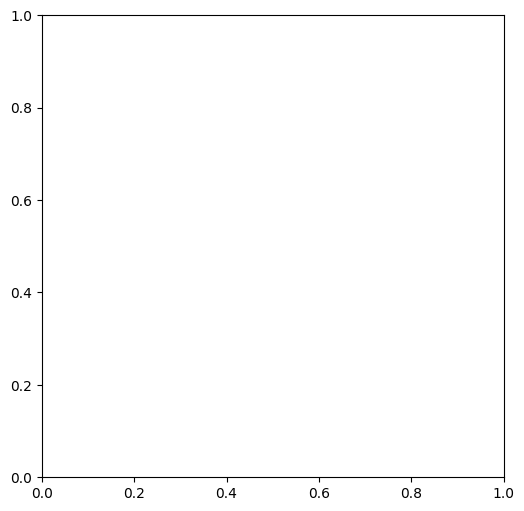

In [679]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
labels = df_vaccine_total.keys()
plt.pie(x=df_vaccine_total["Antal vaccinerade"], autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Delivery Tips by type", fontsize=14);
#pie.savefig("DeliveryPieChart.png")